# Task 1 of Iris Flower classification

In [ ]:
# impoting all the lib..

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df= pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Information about the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Discription about the dataset

In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Shape of the dataset

In [5]:
df.shape

(150, 6)

# Finding the null values

In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Finding the not null values

In [7]:
df.notnull().sum()

Id               150
SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

# datatype of each attribute

In [8]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

# Species distribution

In [9]:
print(df.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


# co-realation of each variable 

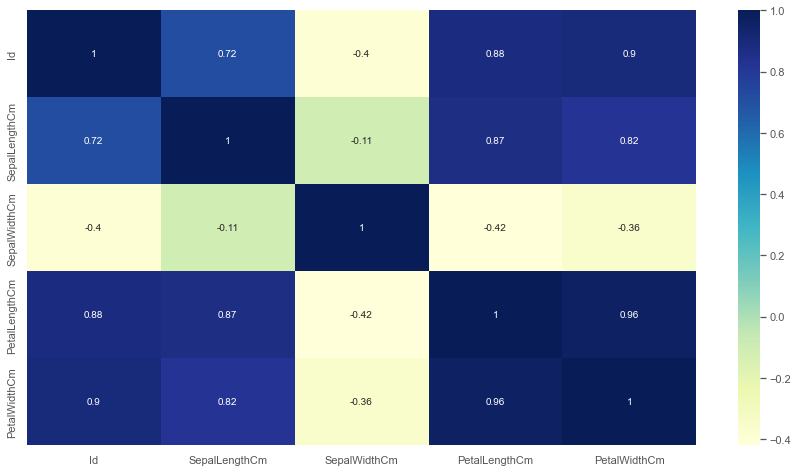

In [10]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [11]:
print(df.columns)


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [12]:
df=df.drop("Id",axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# box and whisker plot

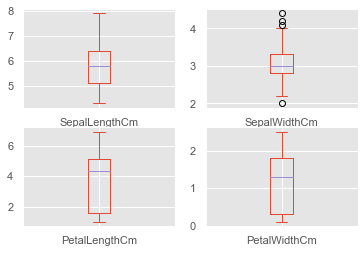

In [13]:
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

# histogram of the each attribute

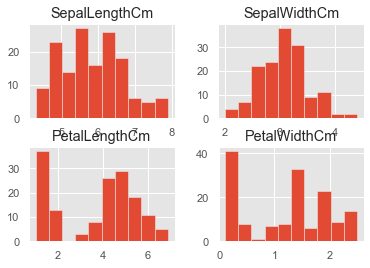

In [14]:
df.hist()
plt.show()

# pie and count chart representation

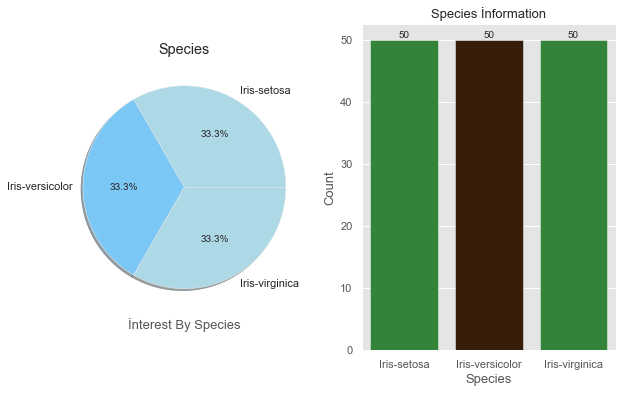

In [15]:
countspecies=df[["Species"]].value_counts().reset_index(name="Count").replace({0:"Iris-setosa",1:"Iris-versicolor",2:"Iris-virginica"})
species=countspecies["Species"].tolist()
count=countspecies["Count"].tolist()

plt.figure(figsize=(10,6))       # figure size decresing
plt.subplot(1,2,1)
explode=[0.1,0.0]
palette=sns.color_palette(["#ADD8E6","#7BC8F6"])
plt.pie(count,labels=species,autopct="%1.1f%%",colors=palette,shadow=True)
plt.title("Species")
plt.xlabel("İnterest By Species",size=13)

plt.subplot(1,2,2)
ax=sns.countplot(data=df,x="Species",palette=sns.color_palette(["#26912E","#3D1C02"]));
for i in ax.containers:
    ax.bar_label(i)
plt.xticks([0,1,2],["Iris-setosa","Iris-versicolor","Iris-virginica"]);
plt.title("Species İnformation",size=13)
plt.xlabel("Species",size=13);
plt.ylabel("Count",size=13);
plt.show()

# Ordinal encoading 

In [40]:
species_map={"Iris-setosa":0,
            "Iris-versicolor":1,
            "Iris-virginica":2}

df['Species1']=df.Species.map(species_map)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species1
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


# co-relation of all the attribute with species

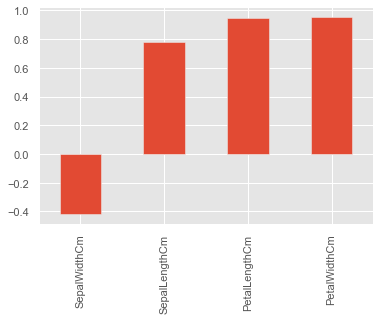

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [44]:
df.corr()['Species1'][:-1].sort_values().plot(kind='bar')
plt.show()
df.drop("Species1",axis=1)

In [45]:
x=df.drop('Species',axis=1)    
y=df['Species']

# splitting the dataset

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.30, random_state=0)

# On applying various algorithm

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [48]:
log_model = LogisticRegression(max_iter=1000)
random = RandomForestClassifier()
knn = KNeighborsClassifier()
gauss = GaussianNB()
d_tree = DecisionTreeClassifier()
svc = SVC()
models = [log_model,random,knn,gauss,d_tree,svc]

In [49]:
acc = []
for model in models:
    print(model,"\n")
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    print(classification_report(y_test,predictions))
    print("Confusion Matrix\n",confusion_matrix(y_test,predictions))
    acc = np.append(acc,accuracy_score(y_test,predictions))
    print("\n---------------------------------------------------------\n")

LogisticRegression(max_iter=1000) 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Confusion Matrix
 [[14  0  0]
 [ 0 18  0]
 [ 0  0 13]]

---------------------------------------------------------

RandomForestClassifier() 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Confusion Matrix
 

# accuracy of various algorithm

In [50]:

for i in range(len(acc)):
    print(models[i],":",acc[i])

LogisticRegression(max_iter=1000) : 1.0
RandomForestClassifier() : 1.0
KNeighborsClassifier() : 1.0
GaussianNB() : 1.0
DecisionTreeClassifier() : 1.0
SVC() : 1.0
